FTCS l2 error norm =  0.02340576783852749
FTCS linf error norm =  0.02570298678470856
FTBS l2 error norm =  0.07088674983845987
FTBS linf error norm =  0.06547907314178925
CTCS l2 error norm =  0.019045707928294534
CTCS linf error norm =  0.016065038560149347
BTCS l2 error norm =  0.021193210139995436
BTCS linf error norm =  0.02149305883225431
lax l2 error norm =  0.009586390698499038
lax linf error norm =  0.011781955699792967
press return to save file and continue


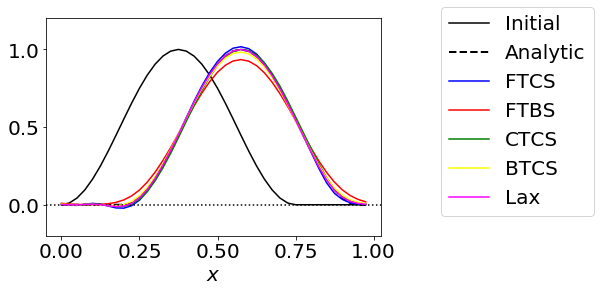

0.025


<Figure size 432x288 with 0 Axes>

In [3]:
#!/usr/bin/python3

# Outer code for setting up the linear advection problem on a uniform
# grid and calling the function to perform the linear advection and plot.

### Copy out most of this code. Code commented with 3#s (like this) ###
### is here to help you to learn python and need not be copied      ###

### The command at the top means that this python function can be  ###
### run directly from the command line (you will also need to do   ###
### "chmod u+x linearAdvect.py" in unix or linux and then execute: ###
### ./linearAdvect.py                                              ###

### Note that blocks are defined by indentation in Python. You     ###
### should never mix tabs and spaces for indentation - use 4 spaces.###
### Setup your text editor to insert 4 spaces when you press tab    ###

### If you are using Python 2.7 rather than Python 3, import various###
### functions from Python 3 such as to use real number division     ###
### rather than integer division. ie 3/2  = 1.5  rather than 3/2 = 1###
#from __future__ import absolute_import, division, print_function

### The matplotlib package contains plotting functions              ###
import matplotlib.pyplot as plt

# read in all the linear advection schemes, initial conditions and other
# code associated with this application
from initialConditions import * 
from advectionSchemes import *
from diagnostics import *
from FTBS import *
from CTCS import *
from Implicitscheme import *
from finitevolume import *
### The main code is inside a function to avoid global variables    ###
def main():
    "Advect the initial conditions using various advection schemes and"
    "compare results"

    # Parameters
    xmin = 0
    xmax = 1
    nx = 40
    nt = 40
    c = 0.2
# ftbs is stable for c between 0 and 1

    # Derived parameters
    dx = (xmax - xmin)/nx

    # spatial points for plotting and for defining initial conditions
    x = np.arange(xmin, xmax, dx)

    # Initial conditions
    phiOld = cosBell(x, 0, 0.75)
    # Exact solution is the initial condition shifted around the domain
    phiAnalytic = cosBell((x - c*nt*dx)%(xmax - xmin), 0, 0.75)

    # Advect the profile using finite difference for all the time steps
    phiFTCS = FTCS(phiOld.copy(), c, nt)
    phiFTBS = FTBS(phiOld.copy(), c, nt)
    phiCTCS = CTCS(phiOld.copy(), c, nt)
    phiBTCS = BTCS(phiOld.copy(), c, nt)
    philax= lax(phiOld.copy(), c, nt)
    # Calculate and print out error norms
    print("FTCS l2 error norm = ", l2ErrorNorm(phiFTCS, phiAnalytic))
    print("FTCS linf error norm = ", lInfErrorNorm(phiFTCS, phiAnalytic))
    print("FTBS l2 error norm = ", l2ErrorNorm(phiFTBS, phiAnalytic))
    print("FTBS linf error norm = ", lInfErrorNorm(phiFTBS, phiAnalytic))
    print("CTCS l2 error norm = ", l2ErrorNorm(phiCTCS, phiAnalytic))
    print("CTCS linf error norm = ", lInfErrorNorm(phiCTCS, phiAnalytic))
    print("BTCS l2 error norm = ", l2ErrorNorm(phiBTCS, phiAnalytic))
    print("BTCS linf error norm = ", lInfErrorNorm(phiBTCS, phiAnalytic))
    print("lax l2 error norm = ", l2ErrorNorm(philax, phiAnalytic))
    print("lax linf error norm = ", lInfErrorNorm(philax, phiAnalytic))
    # Plot the solutions
    font = {'size'   : 20}
    plt.rc('font', **font)
    plt.figure(1)
    plt.clf()
    plt.ion()
    plt.plot(x, phiOld, label='Initial', color='black')
    plt.plot(x, phiAnalytic, label='Analytic', color='black',
             linestyle='--', linewidth=2)
    plt.plot(x, phiFTCS, label='FTCS', color='blue')
    plt.plot(x, phiFTBS, label='FTBS', color='red')
    plt.plot(x, phiCTCS, label='CTCS', color='green')
    plt.plot(x, phiBTCS, label='BTCS', color='yellow')
    plt.axhline(0, linestyle=':', color='black')
    plt.plot(x, philax, label='Lax', color='magenta')
    plt.ylim([-0.2,1.2])
    plt.legend(bbox_to_anchor=(1.15 , 1.1))
    plt.xlabel('$x$')
    input('press return to save file and continue')
    plt.show()
    plt.savefig('plots/3schemes.pdf')
    
    
    print(dx)
### Run the function main defined in this file                      ###
main()